In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import collections
import numpy as np

sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

In [3]:
from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (5, 5)

In [4]:
# from oodiidacc.terra_ood_iid import l as lterra
from oodiidacc.home_ood_iid import l as lhome

In [5]:
from oodiidacc.home_ood_iid_d6 import l as lhomed6
from oodiidacc.home_ood_iid_dn import l as lhomednb
from oodiidacc.lthp_home_dn_wip import l as lhomednv2
from oodiidacc.oodiid_home0123_1104 import l as lhome0123

In [6]:
from oodiidacc.home0_ood_iid_dn_best import l as lhomednbest

In [7]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:


MIN_STEP=4999
MAX_STEP=5001
def plot_slopes_c(l, label, with_stats=False, ax=None, color=None, kwargs={}):
    iids = [ll["val_acc"] for ll in l]
    oods = [ll["test_acc"] for ll in l]
    if color is None:
        colormap = cm.rainbow(np.linspace(0, 1, MAX_STEP-MIN_STEP))
        color = [colormap[ll["step"]-MIN_STEP] for ll in l]
    title = label
    if with_stats:
        outs = stats.linregress(iids, oods)
        names = ["slope", "intercept", "r_value", "p_value", "std_err"]
        dict_out = {key: "{:.4f}".format(value) for key, value in zip(names, outs)}
        title += " " + dict_out["r_value"]
    else:
        dict_out = {}
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title(title, fontsize="large")
        
    ax.scatter(iids, oods, color=color, label=label, **kwargs)
    ax.set_xlabel("IID val acc.", fontsize="large")
    #plt.ylim([0.52, 0.71])
    #plt.xlim([0.77, 0.87])
    ax.set_ylabel("OOD test acc.", fontsize="large")

    return dict_out


plt.rcParams["figure.figsize"] = (5, 5)

# Results lambda towards accuracy

In [9]:
lhomednall = {**lhomednb}
lhomednall["home0_erm_lp_0926"] = lhomed6["home0_erm_lp_0926"]

l_lambda_acc_home0 = []

for key in sorted(lhomednbest.keys()):
    print(key)
    if key == "home0_erm_lp_0926":
        _lambda = 0
    else:
        _lambda = float(key.split("dn")[1].split("_")[0])
        _lambda = 1 / (1 + _lambda)
    new_dict = {"lambda": _lambda}
    ll = [
        line for line in lhomednall[key]
        if line.get("test_env", 0) == 0 and line.get("step") >= 4000
    ]
    assert len(ll) > 0
    for key in ll[0].keys():
        if isinstance(ll[0][key], float):
            list_values = np.array([line[key] for line in ll])
            new_dict[key + "_std"] = np.std(list_values)
            new_dict[key + "_conf"] = np.std(list_values)/np.sqrt(len(list_values))
            new_dict[key + "_max"] = np.max(list_values)
            new_dict[key] = np.mean(list_values)
    l_lambda_acc_home0.append(new_dict)
    new_dict.update(ll[0])


home0_erm_lp_0926
home0_erm_lp_dn0.10_0926
home0_erm_lp_dn0.25_0926
home0_erm_lp_dn0.5_0926
home0_erm_lp_dn0_0926
home0_erm_lp_dn1.0_0926
home0_erm_lp_dn1.5_0926
home0_erm_lp_dn2.0_0926
home0_erm_lp_dn4.0_0926


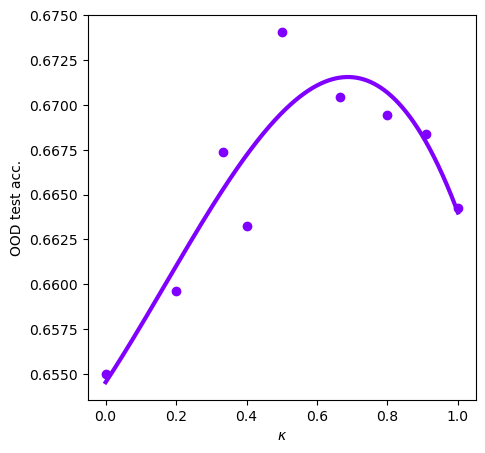

In [22]:
fig = plot.plot_key(
    [sorted(l_lambda_acc_home0, key=lambda x: x["lambda"])],
    "lambda",
    "test_acc",  #, "env0_out_acc+env1_out_acc+env3_out_acc/3"],
    # keyerror="test_acc_conf",
    order=3,
    # title="Accuracy for various $\lambda$",
    _dict_key_to_label={"test_acc": "OOD test acc.", "lambda": r"$\kappa$"},
    loc="no"
)
plot.save_fig(fig, name="diwa/home0_intertrain_lambda_vs_oodacc.png")


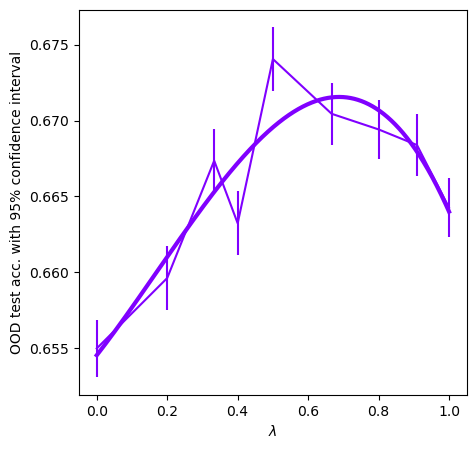

In [18]:
fig = plot.plot_key(
    [sorted(l_lambda_acc_home0, key=lambda x: x["lambda"])],
    "lambda",
    "test_acc",  #, "env0_out_acc+env1_out_acc+env3_out_acc/3"],
    keyerror="test_acc_conf",
    order=3,
    # title="Accuracy for various $\lambda$",
    _dict_key_to_label={"test_acc": "OOD test acc. with 95% confidence interval"},
    loc="no"
)
plot.save_fig(fig, name="strategies/home0_intertrain_lambda_vs_oodacc.png")


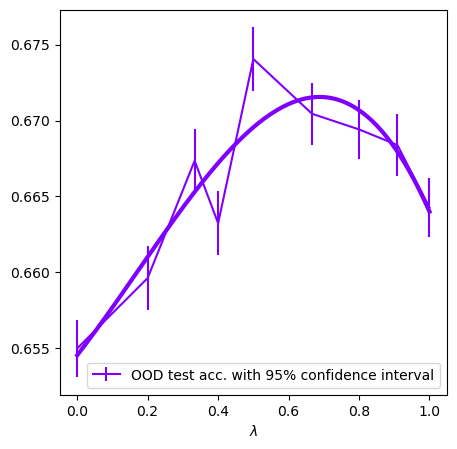

In [8]:
fig = plot.plot_basic_scatter(
    sorted(l_lambda_acc_home0, key=lambda x: x["lambda"]),
    "lambda",
    ["test_acc"],  #, "env0_out_acc+env1_out_acc+env3_out_acc/3"],
    keys_error=["test_acc_conf"],
    order=3,
    # title="Accuracy for various $\lambda$",
    _dict_key_to_label={"test_acc": "OOD test acc. with 95% confidence interval"},
    loc="lower right"
)
plot.save_fig(fig, name="strategies/home0_intertrain_lambda_vs_oodacc.png")


# Full results for OfficeHome Domain Art

In [9]:
keys = sorted(lhomednbest.keys())
keys = ['home0_erm_lp_dn0_0926',
 'home0_erm_lp_dn0.10_0926',
 'home0_erm_lp_dn0.25_0926',
 'home0_erm_lp_dn0.5_0926',
 'home0_erm_lp_dn1.0_0926',
 'home0_erm_lp_dn1.5_0926',
 'home0_erm_lp_dn2.0_0926',
 'home0_erm_lp_dn4.0_0926',
 'home0_erm_lp_0926',]

In [10]:
def merge(ll):
    new_l = {}
    for key in ll[0].keys():
        if isinstance(ll[0][key], str) or key in ["count", "testenv"]:
            # if "divd" in key or "divp" in key or "divf" in key or 'max' in key or "ens1h" in key or "length" in key or key in ["dirs", "count"]:
            new_l[key] = ll[0][key]
        else:
            list_values = [line[key] for line in ll]
            # new_l[key + "_std"] = np.std(list_values)
            new_l[key] = np.mean(list_values)# + np.random.normal(0, abs(np.random.normal(0, 0.003)))
    return new_l

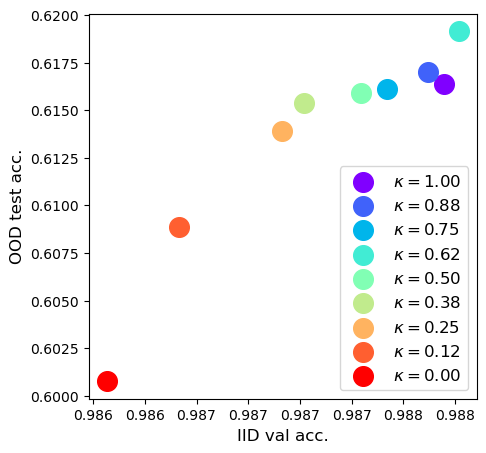

In [13]:
l = {**lhomednb}
l["home0_erm_lp_0926"] = lhomed6["home0_erm_lp_0926"]
plt.rcParams["figure.figsize"] = (5, 5)
dict_out = collections.defaultdict(list)
new_ll = []
for test_env in [0]:
    for i, key in enumerate(keys):
        if key == "home0_erm_lp_0926":
            _lambda = 0
        else:
            _lambda = float(key.split("dn")[1].split("_")[0])
            _lambda = 1 / (1 + _lambda)
        _lambda = [1.00, 0.88, 0.75, 0.62, 0.5, 0.38, 0.25, 0.12, 0.00][i]
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] >= 4200]
        ll = [merge(ll)]
        new_ll.append(ll)

plot.SIZE = "large"
labels = ["$\kappa={:.2f}$".format(_lambda) for _lambda in [1.00, 0.88, 0.75, 0.62, 0.5, 0.38, 0.25, 0.12, 0.00]]
fig = plot.plot_key(
    new_ll,
    key1="train_acc",
    key2="test_acc",
    order=0,
    loc="lower right",
    labels=labels,
    kwargs={"s": 200},
    colors=None,
)
plot.save_fig(fig, "diwa/fig_erm_dnim_iid_vs_ood_home0_mean" + ".png")

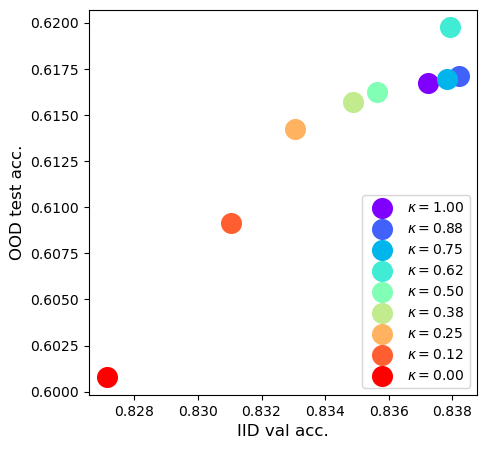

In [22]:
l = {**lhomednb}
l["home0_erm_lp_0926"] = lhomed6["home0_erm_lp_0926"]
plt.rcParams["figure.figsize"] = (5, 5)
dict_out = collections.defaultdict(list)
fig, ax = plt.subplots()
colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
for test_env in [0]:
    for i, key in enumerate(keys):
        if key == "home0_erm_lp_0926":
            _lambda = 0
        else:
            _lambda = float(key.split("dn")[1].split("_")[0])
            _lambda = 1 / (1 + _lambda)
        _lambda = [1.00, 0.88, 0.75, 0.62, 0.5, 0.38, 0.25, 0.12, 0.00][i]
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        ll = [merge(ll)]


plot_slopes_c(ll, label="$\kappa={:.2f}$".format(_lambda), ax=ax, color=colormap[i], kwargs={"s": 200})
ax.legend(loc="lower right")

plot.save_fig(fig, "diwa/fig_erm_dnim_iid_vs_ood_home0_mean" + ".png")

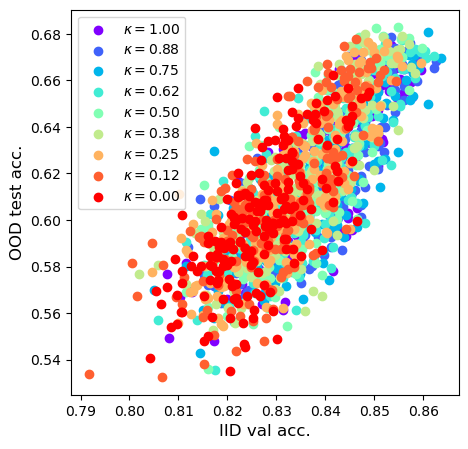

In [11]:
l = {**lhomednb}
l["home0_erm_lp_0926"] = lhomed6["home0_erm_lp_0926"]

dict_out = collections.defaultdict(list)
fig, ax = plt.subplots()
colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
for test_env in [0]:
    for i, key in enumerate(keys):
        if key == "home0_erm_lp_0926":
            _lambda = 0
        else:
            _lambda = float(key.split("dn")[1].split("_")[0])
            _lambda = 1 / (1 + _lambda)
        _lambda = [1.00, 0.88, 0.75, 0.62, 0.5, 0.38, 0.25, 0.12, 0.00][i]
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        plot_slopes_c(ll, label="$\kappa={:.2f}$".format(_lambda), ax=ax, color=colormap[i])
ax.legend(loc="upper left")

#plot.save_fig(fig, "diwa/fig_erm_dnim_iid_vs_ood_home0" + ".png")

# Other domains for OfficeHome

In [ ]:
keys

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
l = lhome0123
keys = l.keys()
dict_out = collections.defaultdict(list)

fig, axes = plt.subplots(2, 2)
for test_env in [0, 1, 2, 3]:
    ax = axes[test_env %2][test_env // 2]
    keys = sorted([key for key in l.keys() if key.startswith("home_") or key.startswith(f"home{test_env}_")])
    colormap = cm.rainbow(np.linspace(0, 1, len(keys)))

    for i, key in enumerate(keys):
        if test_env == 3:
            shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        else:
            shortkey = None
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        if len(ll) ==0:
            print(f"Skip {shortkey} for test_env {test_env}")
        else:
            plot_slopes_c(ll, label=shortkey, ax=ax, color=colormap[i])
    ax.set_title(f"Domain {test_env}")
    if test_env == 3:
        ax.legend(loc="lower right")
fig.suptitle(f"IID-OOD correlation for ERM on OfficeHome")
fig.show()

In [ ]:

l = lhome0123
keys = l.keys()
dict_out = collections.defaultdict(list)


for test_env in [0, 1, 2, 3]:
    keys = sorted([key for key in l.keys() if key.startswith("home_") or key.startswith(f"home{test_env}_")])
    colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
    fig = plt.figure()
    for i, key in enumerate(keys):
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        if len(ll) ==0:
            print(f"Skip {shortkey} for test_env {test_env}")
        else:
            plot_slopes_c(ll, label=shortkey, fig=fig, color=colormap[i])
    plt.title(f"IID-OOD correlation for ERM on OfficeHome domain {test_env}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
dict_out = defaultdict(list)
for test_env in [0]:
    plt.show()
    print(test_env)
    for key in sorted(l.keys(), key=lambda x:x.split("_dn")[1].split("_")):
        if "lpl4w0a_i" in key or "lpl4w0_i" in key:
            if key.startswith("terra" + str(test_env)):
                plt.show()
                print(key)
                short_key = "_".join(key.split("_")[1:])
                dict_out[short_key].append(plot_slopes_c(l[key], label=key))